### Import Libraries

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loading the data 

In [25]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' , encoding = 'utf-8')
print('\033[1m' +"Number of Resume :"+'\033[0m',resumeDataSet.shape[0])
resumeDataSet.head()

Number of Resume : 962


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [26]:
# Adding one more column for cleanind resmues

resumeDataSet['Cleaned_Resume'] = ' '

In [27]:
print('\033[1m' +'Displaying the unique skills in Resume :'+'\033[0m',len(resumeDataSet.Category.unique()))
resumeDataSet.Category.unique()

Displaying the unique skills in Resume : 25


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [28]:
print('\033[1m' +'Displaying the categories and the number of resumes belonging to it :'+'\033[0m')

resumeDataSet.Category.value_counts()

Displaying the categories and the number of resumes belonging to it :


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

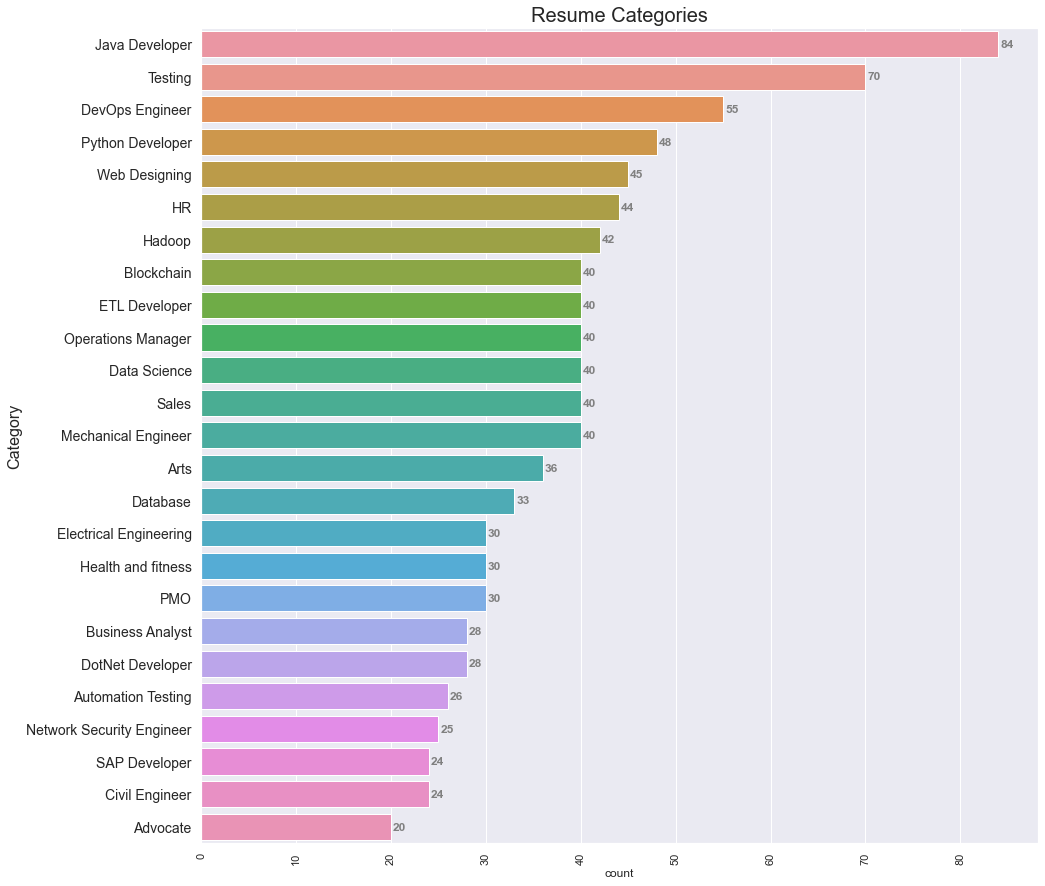

In [29]:
# Visualising the categories and the number of resumes belonging to it

sns.set(style='darkgrid')
sns.set_palette('pastel')

plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Category', fontsize=16)
plt.title('Resume Categories', fontsize=20)

ax = sns.countplot(y='Category', data=resumeDataSet, order=resumeDataSet.Category.value_counts().index)
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=12, fontweight='bold', color='grey')


### Distribution of Categories in Percentage

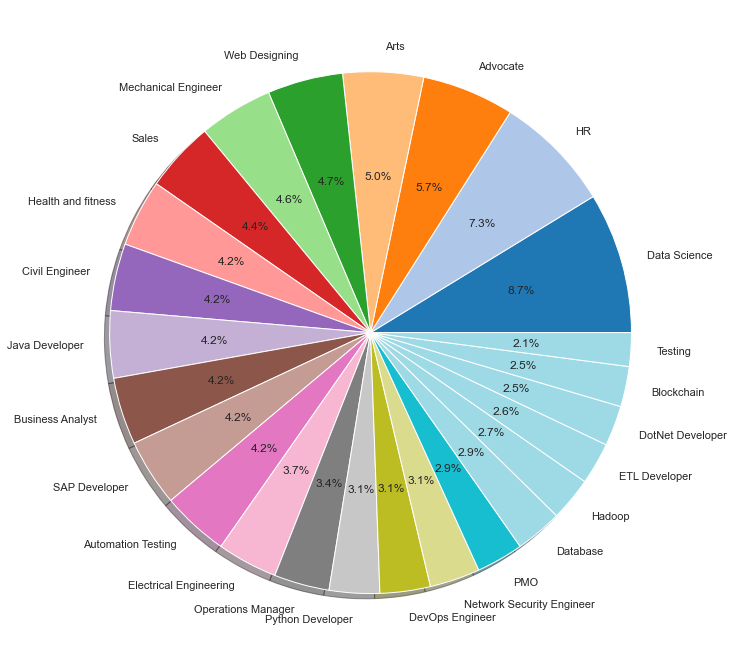

In [30]:
from matplotlib.gridspec import GridSpec

target_counts = resumeDataSet['Category'].value_counts()
target_labels = resumeDataSet['Category'].unique()

# Make square figure and axes
fig = plt.figure(figsize=(12, 12))
the_grid = GridSpec(2, 2)
colors = plt.cm.tab20(range(len(target_labels)))
source_pie, _, _ = plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%', shadow=True, colors=colors)

# Set the facecolor of each pie slice
for i, slice in enumerate(source_pie):
    slice.set_facecolor(colors[i])

plt.show()


In [31]:
# cleaning the data

import re

def cleanResume(resumeText):
    resumeText = re.sub(r'http\S+\s*' , ' ' , resumeText) #To remove the urls
    resumeText = re.sub(r'RT|CC' , ' ' , resumeText) #Remove RT and CC
    resumeText = re.sub('#\S+' , ' ' , resumeText) #Remove hashtags
    resumeText = re.sub('@\S+' , ' ' , resumeText) #Removing mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]' , r' ' , resumeText)
    resumeText = re.sub(r'\s+' , ' ' , resumeText ) #remove extra white space
    
    return resumeText

resumeDataSet['Cleaned_Resume'] = resumeDataSet.Resume.apply(lambda x : cleanResume(x))

resumeDataSet['Cleaned_Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to accept the challenges Positive...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Cleaned_Resume, Length: 962, dtype: object

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72), ('Used', 72)]


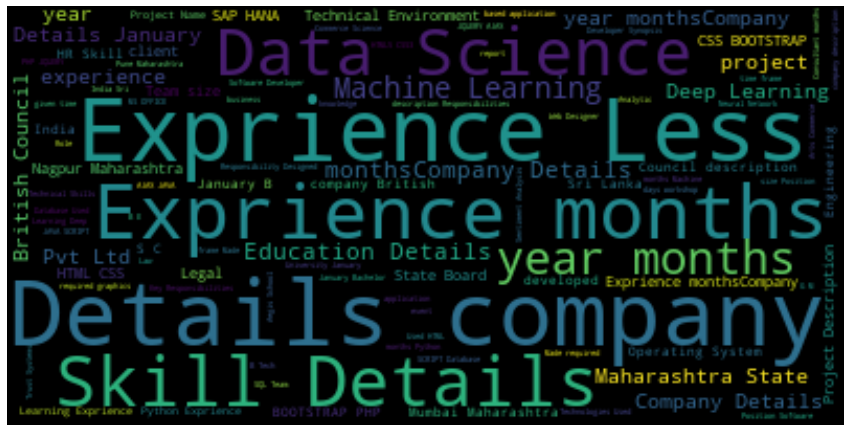

In [32]:
import nltk
from nltk.corpus import stopwords
import string 
from wordcloud import WordCloud

# removing stopwords 

oneSetOfStopWords = set(stopwords.words('english') + ['``' , "''"])
totalWords = []
Sentences = resumeDataSet['Resume'].values 
cleanedSentences = ' '

for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences +=  cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
            
# Word cloud

wordfreqdist  = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize = (15,15))
plt.imshow(wc , interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [33]:
# converting label into numbers using label encoder

from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()

for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

### Training the machine learning model for resume screening

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# vectorization

requiredText = resumeDataSet['Cleaned_Resume'].values
requiredTarget = resumeDataSet['Category'].values

wordvectorizer = TfidfVectorizer(sublinear_tf = True , stop_words = 'english' ,
                                 max_features = 1500)
wordvectorizer.fit(requiredText)

WordFeatures  = wordvectorizer.transform(requiredText)

print('Features Completed')


Features Completed


In [36]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(WordFeatures , requiredTarget , random_state = 0 , test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


### Model Building

In [14]:
#Importing Machine learning Model library

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from pandas.plotting import scatter_matrix


##### Random Forest

In [15]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 1.0


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        14
     

In [16]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, WordFeatures, requiredTarget, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.99285714 1.         1.         1.         1.        ]
Mean CV Precision Score : 0.9985714285714286
Std deviation : 0.0028571428571428467


##### k-Nearest Neighbors

In [27]:
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred=knc.predict(X_test)
print('\033[1m'+'KNeighborsClassifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of KNeighborsClassifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of KNeighborsClassifier'+'\033[0m \n',classification_report(y_test, y_pred))

KNeighborsClassifier


Accuracy Score of KNeighborsClassifier : 0.9896373056994818


classification Report of KNeighborsClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
  

In [28]:
CVscore = cross_val_score(knc, WordFeatures, requiredTarget, cv =5)
print('\033[1m'+'Cross Validation Score', knc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score KNeighborsClassifier() :

CVScore : [0.96891192 0.99481865 0.98958333 0.99479167 0.99479167]
Mean CV Precision Score : 0.9885794473229707
Std deviation : 0.01003922861785775


### Saving the model

In [38]:
import joblib

In [19]:
filename = "resume4.joblib"
joblib.dump(rfc, filename)

['resume4.joblib']

#### Load Model

In [39]:
# Load the pickled model
loaded_model = joblib.load("resume.joblib")

In [20]:

result = loaded_model.predict(X_test[0])
print(result)

[20]


In [14]:
# checking the value of result
decoded_data = le.inverse_transform([20])
print(decoded_data)

['Python Developer']


### Converting PDF Resume and Passing to the Model

In [43]:
from PyPDF2 import PdfReader

def pdf_to_text_list(pdf_path):
    text_list = []
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        num_pages = len(reader.pages)
        
        for page_num in range(num_pages):
            page = reader.pages[page_num]
            text = page.extract_text()
            words = text.split()  # Split text into individual words
            text_list.extend(words)  # Extend the list with the words
    
    return text_list   

resume_path = input("Enter Resume path : ")    
resume_text = convert_pdf_to_text(resume_path)

# Preprocess the resume text
cleaned_resume = cleanResume(resume_text)

# Vectorize the cleaned resume text
resume_features = wordvectorizer.transform([cleaned_resume])

# Use the trained model to predict the category
predicted_category = loaded_model.predict(resume_features)


decoded_d = le.inverse_transform([predicted_category])
print("Resume belongs to : ",decoded_d)

Enter Resume path : F:\my work\document__2_.pdf
Resume belongs to :  ['Advocate']


### To Check Experience or Fresher

In [25]:
# To Check Experience or Fresher    
def checkExperience(resumeText):
    if 'fresher'not in resumeText.lower():
        return 'Experienced'
    else:
        return 'Fresher'
checkExperience(resume_text)

'Experienced'